In [2]:
!pip install numpy pandas matplotlib seaborn scikit-learn nltk wordcloud

Defaulting to user installation because normal site-packages is not writeable


### Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Reading and Data Understanding

In [4]:
spam_class_df = pd.read_csv('spam.csv', encoding="ISO-8859-1" )

In [5]:
spam_class_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 1.6 MB


In [6]:
spam_class_df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4940,ham,Omg you can make a wedding chapel in frontierv...,NaN,NaN,NaN
1241,ham,"I want to show you the world, princess :) how ...",NaN,NaN,NaN
4685,ham,But pls dont play in others life.,NaN,NaN,NaN
1035,ham,"Hello baby, did you get back to your mom's ? A...",NaN,NaN,NaN
1441,ham,Ya:)going for restaurant..,NaN,NaN,NaN


In [7]:
spam_class_df.shape

(5572, 5)

In [8]:
spam_class_df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

### Perform following steps
1. Data Cleaning
2. Exploratory Data Analysis (EDA)
3. Text Processing - Tokenization, stopword, stemming, vectorization
4. Model Building
5. Model Evaluation

#### 1. Data Cleaning

In [9]:
spam_class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
spam_class_df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [11]:
# Drop unnecessary columns
spam_class_df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [12]:
spam_class_df.sample(5)

,v1,v2
1722,ham,Thought praps you meant another one. Goodo! I'...
2300,ham,Nothin comes to my mind. ÌÏ help me buy hanger...
1199,ham,NEFT Transaction with reference number &lt;#&...
3864,ham,"THATåÕS ALRITE GIRL, U KNOW GAIL IS NEVA WRONG..."
4701,ham,Anytime...


In [13]:
# Rename the columns
spam_class_df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
spam_class_df.sample(5)

,target,text
4171,ham,"Sorry, I'll call later"
787,spam,Ever thought about living a good life with a p...
2727,ham,Whatsup there. Dont u want to sleep
3268,ham,Raviyog Peripherals bhayandar east
2249,spam,"Thanks for your ringtone order, ref number R83..."


#### 2. Data Encoding, Handlig Missing Values and Removing Duplcicates

In [14]:
# Encode the 'target' column
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [15]:
spam_class_df['target'] = encoder.fit_transform(spam_class_df['target'])

In [16]:
spam_class_df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
spam_class_df.sample(5)

,target,text
2398,0,YO YO YO BYATCH WHASSUP?
5227,0,I re-met alex nichols from middle school and i...
3156,0,Havent shopping now lor i juz arrive only
918,0,Hey you gave them your photo when you register...
5235,0,Am on the uworld site. Am i buying the qbank o...


In [18]:
# Remove null values
spam_class_df.isnull().sum()

target    0
text      0
dtype: int64

In [19]:
# Check for duplicates and remove duplicate rows
spam_class_df.duplicated().sum()

403

In [20]:

spam_class_df[spam_class_df.duplicated()]

,target,text
102,0,As per your request 'Melle Melle (Oru Minnamin...
153,0,As per your request 'Melle Melle (Oru Minnamin...
206,0,"As I entered my cabin my PA said, '' Happy B'd..."
222,0,"Sorry, I'll call later"
325,0,No calls..messages..missed calls
...,...,...
5524,1,You are awarded a SiPix Digital Camera! call 0...
5535,0,"I know you are thinkin malaria. But relax, chi..."
5539,0,Just sleeping..and surfing
5553,0,Hahaha..use your brain dear


In [21]:
spam_class_df = spam_class_df.drop_duplicates(keep='first')

In [22]:
spam_class_df.shape

(5169, 2)

#### 3. Exploratory Data Analysis (EDA)

In [23]:
spam_class_df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

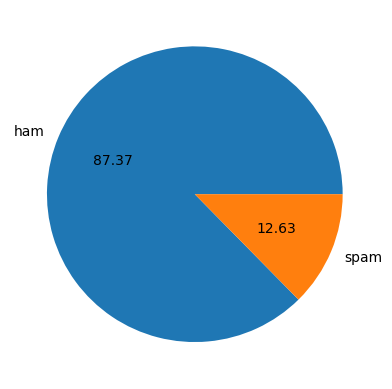

In [24]:
plt.pie(spam_class_df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [25]:
# Import Natural Language Toolkit
import nltk

In [26]:
# Download punkt_tab - a sentence tokenizer
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [27]:
# For each row, we calculate the number of characters. Use apply() function
spam_class_df['num_characters'] = spam_class_df['text'].apply(len)

In [28]:
spam_class_df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
# For each row, we calculate the number of words. Use apply() lambda function
spam_class_df['num_words'] = spam_class_df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [30]:
spam_class_df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
# For each row, we calculate the number of sentences. Use apply() lambda function
spam_class_df['num_sentences'] = spam_class_df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [32]:
spam_class_df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
spam_class_df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences'], dtype='object')

In [34]:
# Print some meta-data for dataset

spam_class_df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
# Consider only ham messages
spam_class_df[spam_class_df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


#### 4. Data Visualization

<Axes: xlabel='num_characters', ylabel='Count'>

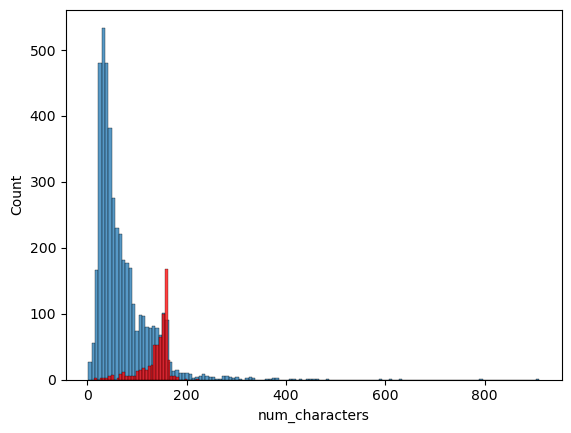

In [36]:

sns.histplot(spam_class_df[spam_class_df['target'] == 0]['num_characters'])
sns.histplot(spam_class_df[spam_class_df['target'] == 1]['num_characters'], color='red')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


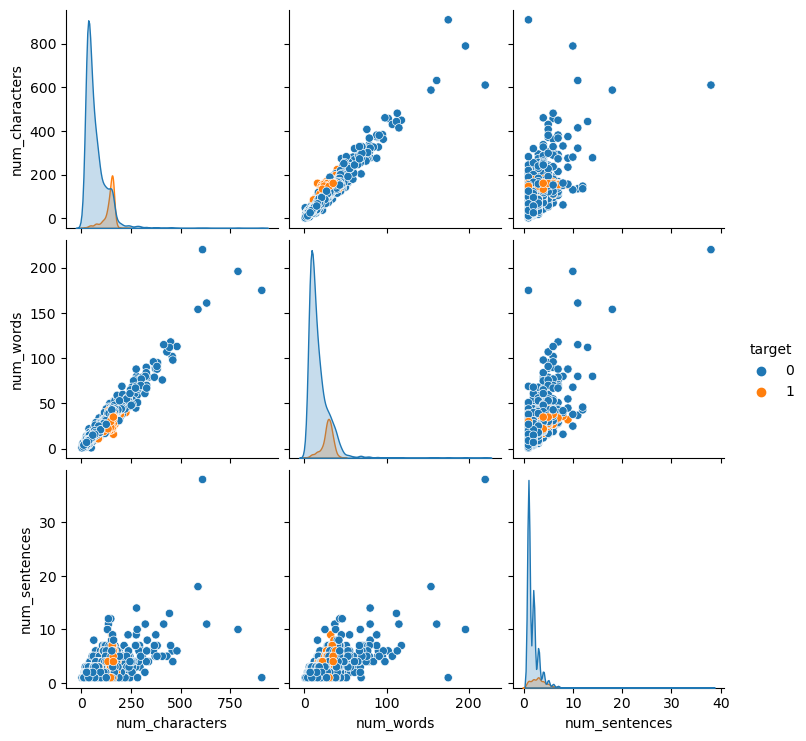

In [37]:
sns.pairplot(spam_class_df, hue='target')

<Axes: >

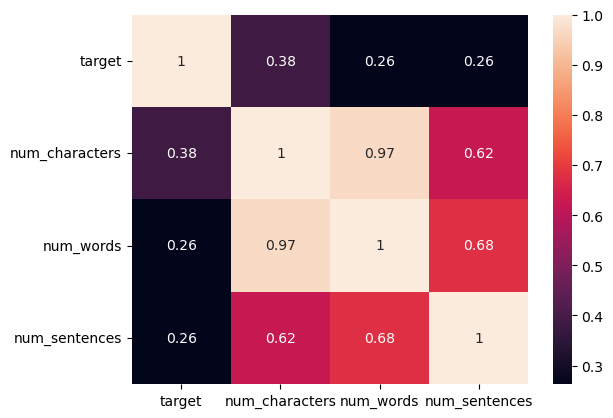

In [38]:
sns.heatmap(spam_class_df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True)

#### 5. Data Preprocessing
- lowercase all characters
- tokenize
- remove special characters (, . !...)
- stopword removal
- punctuation removal
- stemming (taking the base word)

In [39]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [42]:
import string

In [43]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
# apply above methods one by one and return clean data
def transform_text(text):
    text = text.lower() #lowercasing
    text = nltk.word_tokenize(text) #tokenizing

    y = []

    for word in text:
        if word.isalnum(): # if the characters are alpha numeric (a-z, 0-9):
            y.append(word)

    text = y[:] # text will now have only alphanumeric words
    y.clear()

    for word in text: # stopword removal and punct removal
        if word not in stopwords.words('english') and word not in string.punctuation: 
            y.append(word)

    text = y[:]
    y.clear()

    for word in text: # stemming
        print(word)
        y.append(ps.stem(word))

    return " ".join(y)

In [45]:
# Example to see the transform_text function 
transform_text("I'm going to home soon and i dont want to talk to anyone about it.")

going
home
soon
dont
want
talk
anyone


'go home soon dont want talk anyon'

In [46]:
spam_class_df['transformed_text'] = spam_class_df['text'].apply(transform_text)

go
jurong
point
crazy
available
bugis
n
great
world
la
e
buffet
cine
got
amore
wat
ok
lar
joking
wif
u
oni
free
entry
2
wkly
comp
win
fa
cup
final
tkts
21st
may
text
fa
87121
receive
entry
question
std
txt
rate
c
apply
08452810075over18
u
dun
say
early
hor
u
c
already
say
nah
think
goes
usf
lives
around
though
freemsg
hey
darling
3
week
word
back
like
fun
still
tb
ok
xxx
std
chgs
send
rcv
even
brother
like
speak
treat
like
aids
patent
per
request
melle
oru
minnaminunginte
nurungu
vettam
set
callertune
callers
press
9
copy
friends
callertune
winner
valued
network
customer
selected
receivea
prize
reward
claim
call
claim
code
kl341
valid
12
hours
mobile
11
months
u
r
entitled
update
latest
colour
mobiles
camera
free
call
mobile
update
co
free
08002986030
gon
na
home
soon
want
talk
stuff
anymore
tonight
k
cried
enough
today
six
chances
win
cash
100
pounds
txt
csh11
send
cost
6days
tsandcs
apply
reply
hl
4
info
urgent
1
week
free
membership
prize
jackpot
txt
word
claim
81010
c
lccltd
pobox


In [47]:
spam_class_df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [49]:
import wordcloud
from wordcloud import WordCloud

In [50]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [51]:
spam_wc = wc.generate(spam_class_df[spam_class_df['target'] == 1]['transformed_text'].str.cat(sep=" "))

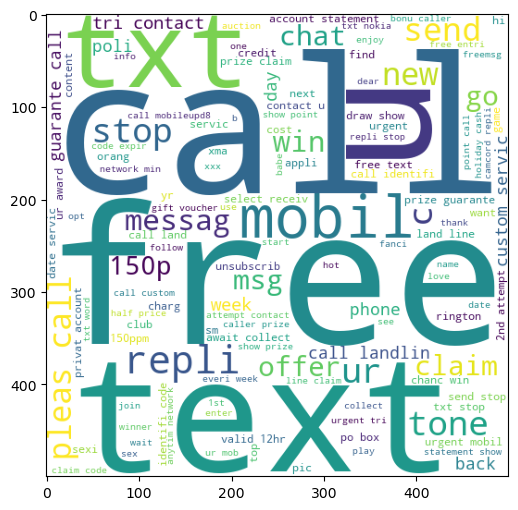

In [52]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [53]:
ham_wc = wc.generate(spam_class_df[spam_class_df['target'] == 0]['transformed_text'].str.cat(sep=" "))

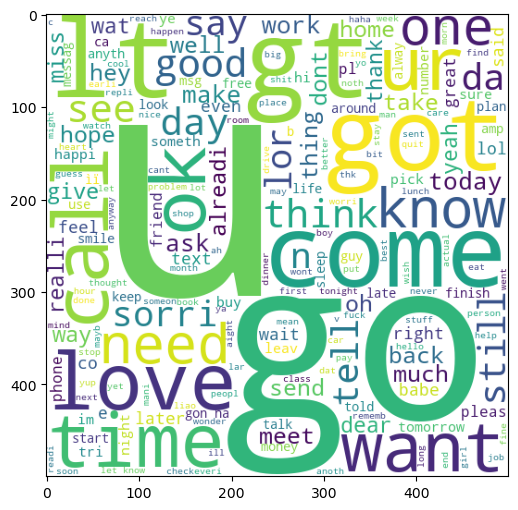

In [54]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [55]:
spam_corpus = []

for msg in spam_class_df[spam_class_df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [56]:
len(spam_corpus)

9939

In [57]:
from collections import Counter

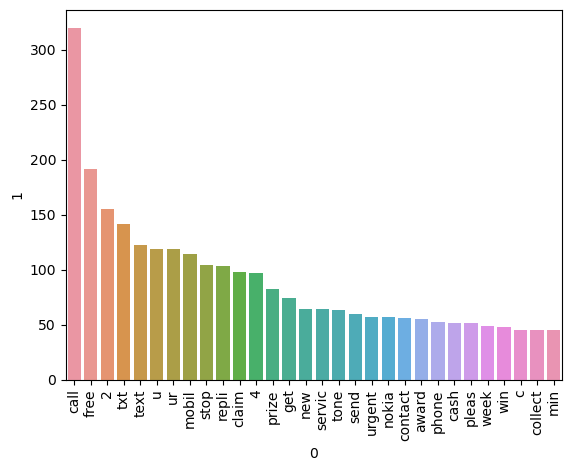

In [58]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [59]:
ham_corpus = []

for msg in spam_class_df[spam_class_df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [60]:
len(ham_corpus)

35404

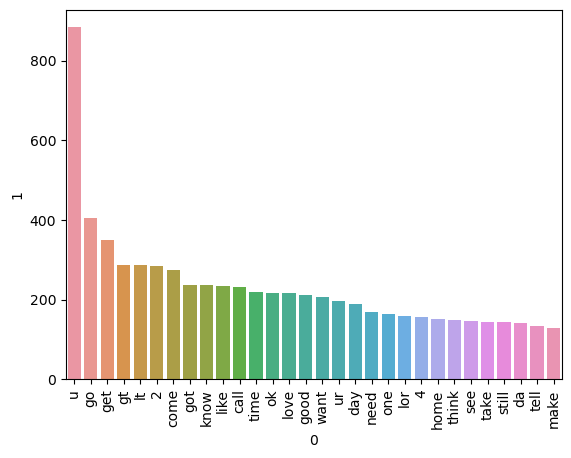

In [61]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

#### 6. Model Building

In [62]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()

# tfidf -> term frequency and inverse document frequency -> it's an encoding technique. Used in vectorization. Since ML model cannot understand the text,
# text is converted to numeric format (each word is converted to real number), aka Vectorization.
# max_features = 3000 => Each sentence in transformed_text is converted to a vector of size 3000 long. This is a hyper parameter.
tfidf = TfidfVectorizer(max_features=3000)   

In [63]:
# transformed_text is converted to array and sent to tfidf to convert to real numbers.
X = tfidf.fit_transform(spam_class_df['transformed_text']).toarray()

In [64]:
X.shape

(5169, 3000)

In [66]:
y = spam_class_df['target'].values

In [67]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [70]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [71]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [72]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [73]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [74]:
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


#### NOTE : ********** Model Training is complete. Select MultinomialNB since this is good at handling class imbalance

In [75]:
import pickle # helps in storing the model

In [76]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))